### Import different python lib.

Panda- reading the data,cleaning of data.
numpy - it provide multidimensional array object used for various math operation.
matplotlib and seaborn - Attractive and informative graphs.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [35]:
df=pd.read_excel('D:/IITK/Project/Bank_Personal_Loan_Modelling.xlsx',1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [36]:
df['Personal Loan'].unique()

array([0, 1], dtype=int64)

In [37]:
df.shape
#(row,coloumn)

(5000, 14)

In [38]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

##### ID and Zip code doesnt add any value in analysis. 
So we are dropping it.  axis =1 means we are dropping coloumns and default it is row(axis=0).  inplace = True means we are deleting it permanently.

In [39]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [40]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [41]:
import plotly.express as px


Here we are using five point summary to get desciption of data. (box = boxplot).

In [42]:
fig=px.box(df,y=['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',])
fig.show()

#### Summary :
age and experience is symmetrically distributed but Income is Positively distributed. Experince has some negative value which is wrong data.

### Now we will see some data visualization technique.

In [43]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

In [44]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>],
       [<AxesSubplot:title={'center':'CD Account'}>,
        <AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>]], dtype=object)

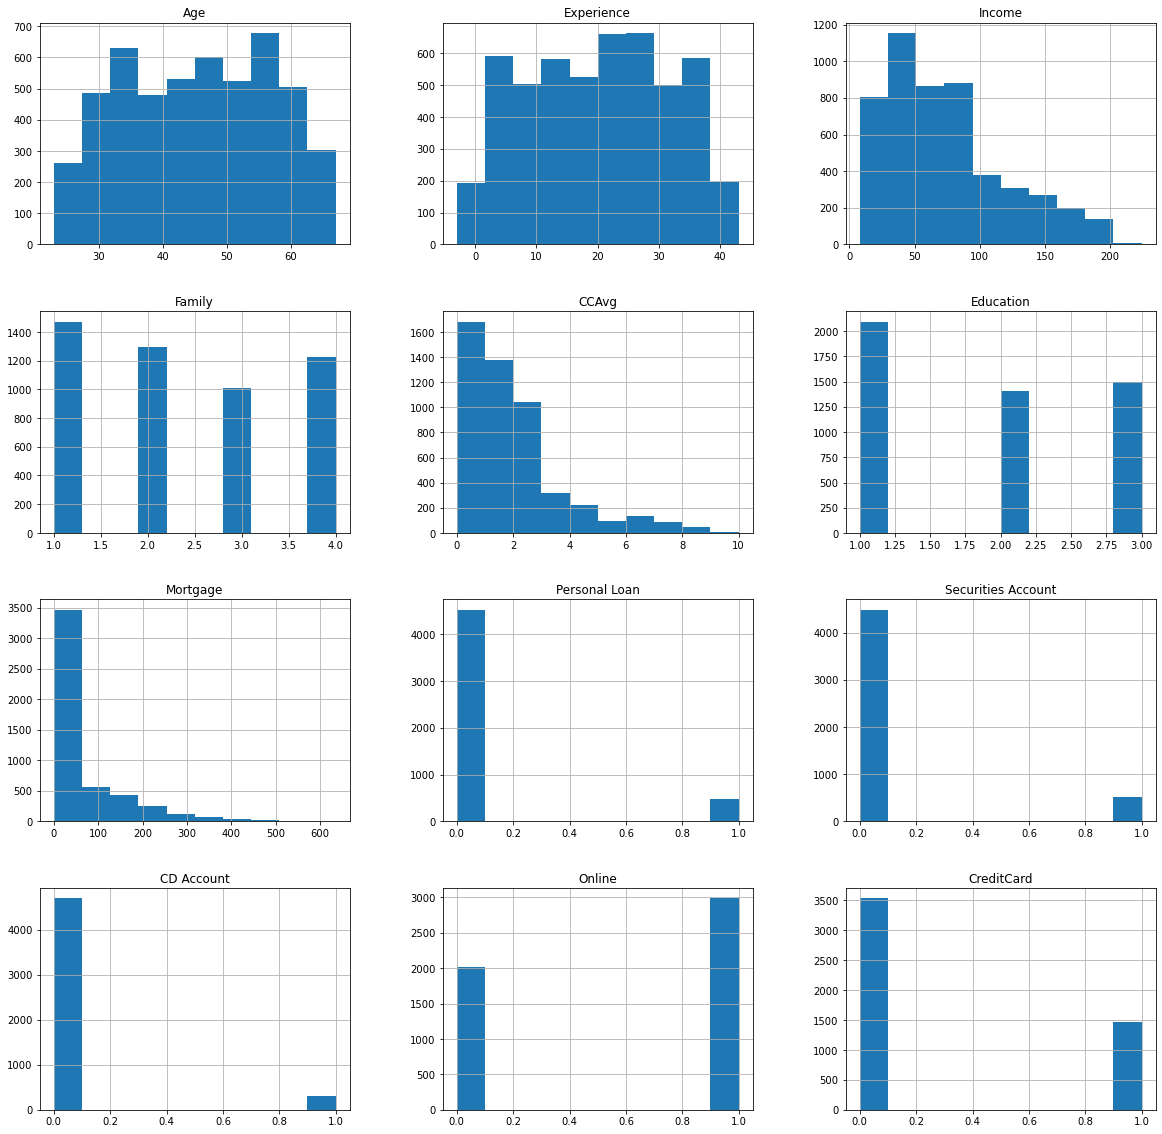

In [45]:
df.hist(figsize=(20,20))

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Experience', ylabel='Density'>

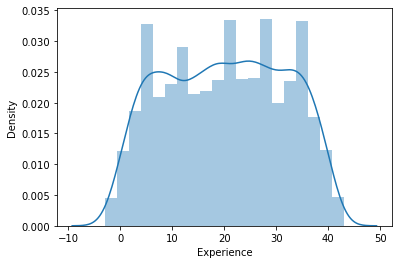

In [46]:
sns.distplot(df['Experience'])

In [47]:
df['Experience'].mean()

20.1046

In [48]:
negative_exp=df[df['Experience']<0]
negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age', ylabel='Density'>

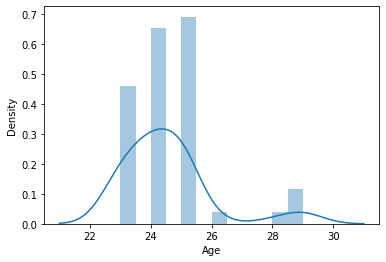

In [49]:
sns.distplot(negative_exp['Age'])

##### The above distribution shows that age of people whose experience is negative is between 20 and 30.

In [50]:
negative_exp['Experience'].mean()

-1.4423076923076923

In [51]:
negative_exp.size

624

In [52]:
print("There are {} records which has negative experience,aprrox {} % ".format(negative_exp.size,((negative_exp.size/df.size)*100)))

There are 624 records which has negative experience,aprrox 1.04 % 


In [53]:
data=df.copy()
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


#### Negative experience is wrong entry.
We will try to replace all the negative entry with mean value.



In [54]:
data['Experience']=np.where(data['Experience']<0,data['Experience'].mean(),data['Experience'])

In [55]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


You can see above there is no entry for experince less than 0 as it has been changed with mean.

In [56]:
df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.050089,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.013152,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


Here annot = True is for showing value in heat map.


<AxesSubplot:>

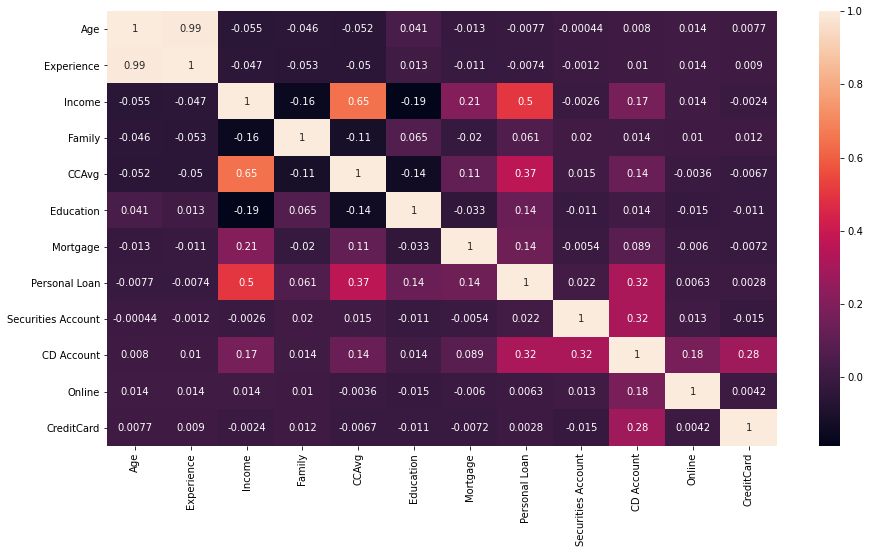

In [57]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)


#### Experience and age are highly correlated. 
So to avoid multi-collinearity we can drop either age or experience. I am droping here experience.

In [58]:
data=data.drop(['Experience'],axis=1)

In [59]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


### Analysize education status of customer:

In [60]:
data['Education'].unique()

array([1, 2, 3], dtype=int64)

We are creating function to change respctive number to corresponding education level.

In [61]:
def mark(x):
    if x==1:
        return 'Underegraduate'
    elif x==2:
        return 'Graduate'
    else :
        return 'Professional'
    

In [62]:
data['Edu']=data['Education'].apply(mark)

In [63]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu
0,25,49,4,1.6,1,0,0,1,0,0,0,Underegraduate
1,45,34,3,1.5,1,0,0,1,0,0,0,Underegraduate
2,39,11,1,1.0,1,0,0,0,0,0,0,Underegraduate
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [64]:
EDU=data.groupby('Edu')['Age'].count()

we are grouping age on the basis of Edu and counting the number of data under UG,G and P(Undergraduate,Graduate,Professional)

In [65]:
EDU

Edu
Graduate          1403
Professional      1501
Underegraduate    2096
Name: Age, dtype: int64

### PIE CHART.

In [67]:
fig=px.pie(data,values=EDU,names=EDU.index,title='Pie chart')
fig.show()

#### Summary: 
Most of the bank customers are UG.

### Analyse of Account holder Distribution:

In [68]:
def security(row):
    if (row['Securities Account']==1) & (row['CD Account']==1):
        return'Hold both securities and Deposit'
    elif (row['Securities Account']==0) & (row['CD Account']==0):
         return'Does not Hold  securities or Deposit'
    elif (row['Securities Account']==0) & (row['CD Account']==1):
         return'Does not Hold  securities'
    elif (row['Securities Account']==1) & (row['CD Account']==0):
        return'Does not Hold deposit'

In [69]:
data['Account_holder_category']=data.apply(security,axis=1)

In [70]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu,Account_holder_category
0,25,49,4,1.6,1,0,0,1,0,0,0,Underegraduate,Does not Hold deposit
1,45,34,3,1.5,1,0,0,1,0,0,0,Underegraduate,Does not Hold deposit
2,39,11,1,1.0,1,0,0,0,0,0,0,Underegraduate,Does not Hold securities or Deposit
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,Does not Hold securities or Deposit
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,Does not Hold securities or Deposit


In [71]:
values=data['Account_holder_category'].value_counts()
values

Does not Hold  securities or Deposit    4323
Does not Hold deposit                    375
Does not Hold  securities                155
Hold both securities and Deposit         147
Name: Account_holder_category, dtype: int64

In [72]:
fig=px.pie(data,values=values,names=values.index,title='Pie chart')
fig.show()

#### Summary :
86.5 % people do not hold any account. We can encourage them to open account to increase assets of bank.

In [73]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu', 'Account_holder_category'],
      dtype='object')

Here we are drawing two different boxplot on the basis of 'personal loan'

In [74]:
px.box(data,x='Edu',y='Income',facet_col='Personal Loan')

#### Summary :
Income range for all three UG,G,P is more who are applying for loan or who have personal loan.

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



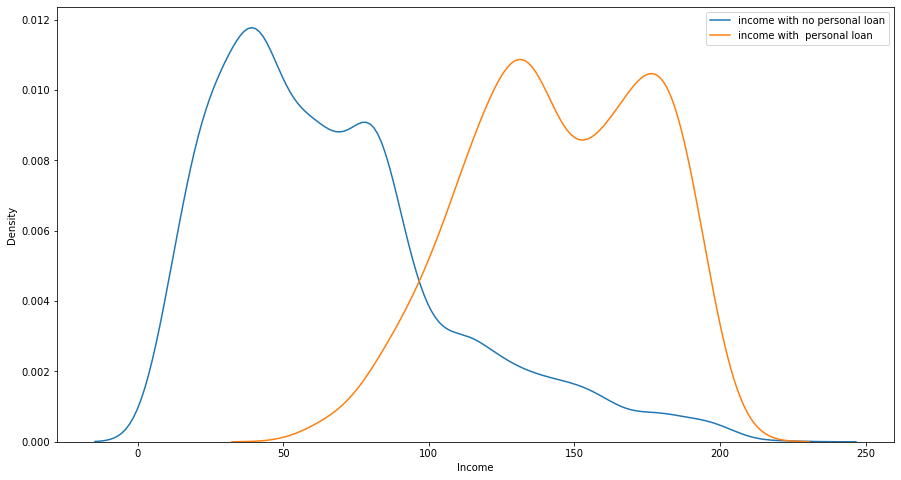

In [75]:
    plt.figure(figsize=(15,8))
    sns.distplot(data[data['Personal Loan']==0]['Income'],hist=False,label='income with no personal loan')
    sns.distplot(data[data['Personal Loan']==1]['Income'],hist=False,label='income with  personal loan')
    plt.legend()

#### Summary: 
we can see that personal which are going for personal loan have higher income as compare to those who dosen't going for it.

### Automation Function :

In [76]:
def plot(col1,col2,label1,label2,title):
    plt.figure(figsize=(15,8))
    sns.distplot(data[data[col1]==0][col2],hist=False,label=label1)
    sns.distplot(data[data[col1]==1][col2],hist=False,label=label2)
    plt.legend()
    plt.title(title)

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



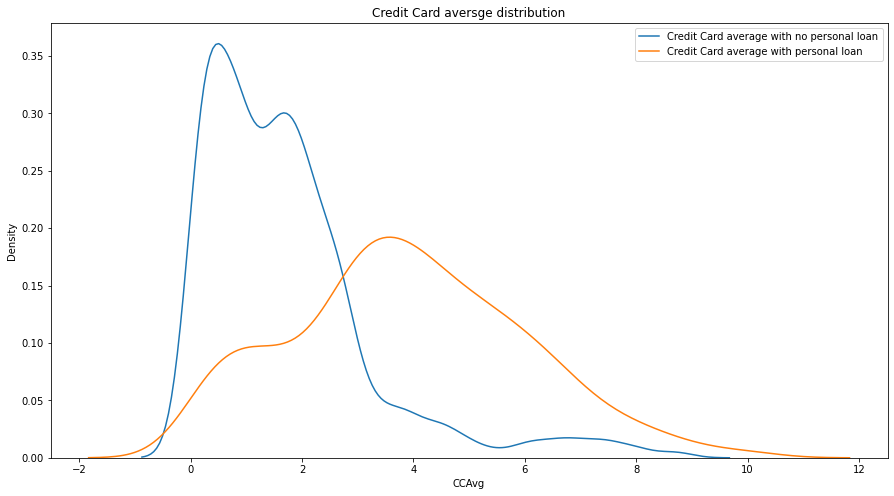

In [77]:
plot('Personal Loan','CCAvg','Credit Card average with no personal loan','Credit Card average with personal loan','Credit Card aversge distribution')

#### Summary: Customer with CCAvg with no personal loan is right scewed.

In [78]:
    data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu', 'Account_holder_category'],
      dtype='object')

In [79]:
col_names=['Securities Account','Online', 'Account_holder_category','CreditCard']


#### Analyzing categories of customer on different attributes.
For example, attributes are mentioned in col_names.

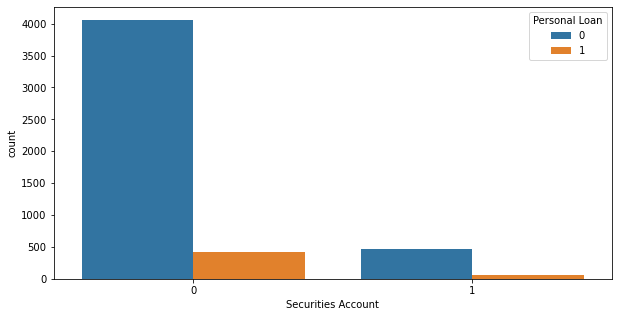

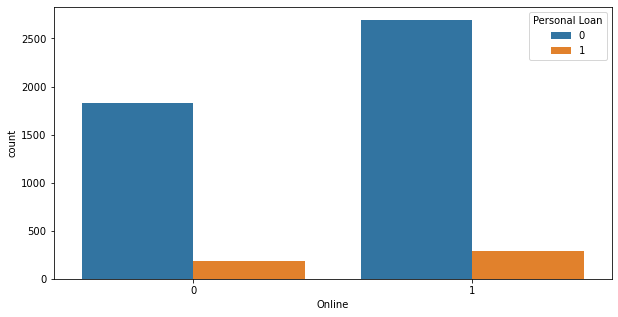

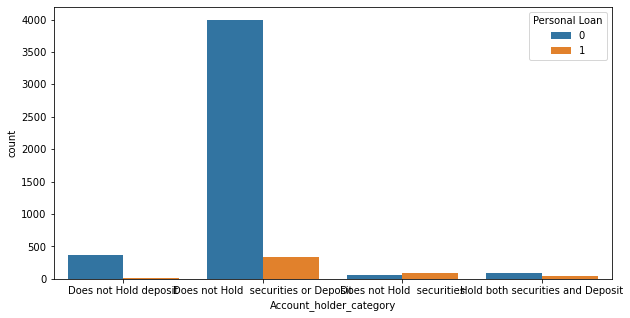

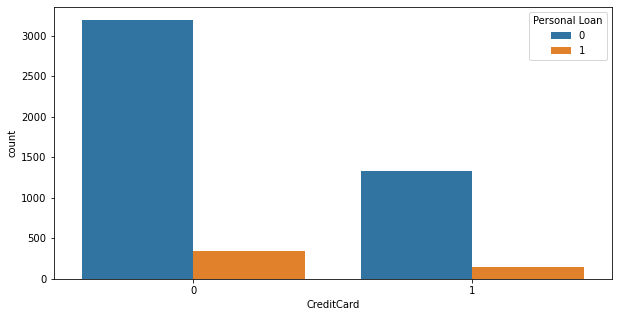

In [80]:
for i in col_names:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,hue='Personal Loan',data=data)